# Convolutional Neural Networks (CNN)


* [Loading the Data Set](#1)
* [Normalization, Reshape and Label Encoding ](#2)
* [Train Test Split](#3)
* [Convolutional Neural Network](#4)
    * [What is Convolution Operation?](#5)
    * [Same Padding](#6)
    * [Max Pooling](#7)
    * [Flattening](#8)
    * [Full Connection](#9)
* [Implementing with Keras](#10)
    * [Create Model](#11)
    * [Define Optimizer](#12)
    * [Compile Model](#13)
    * [Epochs and Batch Size](#14)
    * [Data Augmentation](#15)
    * [Fit the Model](#16)
    * [Evaluate the Model](#17)
* [Deep Learning Tutorial for Beginners](https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners)
* [Artificial Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Convolutional Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)
* [Recurrent Neural Network with Pytorch](https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch)
* [Conclusion](#18)


In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

<a id="1"></a>
## Loading the Data Set
* In this part we load and visualize the data.

In [62]:
# read train 
train = pd.read_csv ('train.csv.zip')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# read test 
test = pd.read_csv ('test.csv.zip')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
# put labels into y_train variable
y_train = train['label']
# Drop 'label' column
X_train = train.drop(columns='label')

Uniques labels: [0 1 2 3 4 5 6 7 8 9]


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

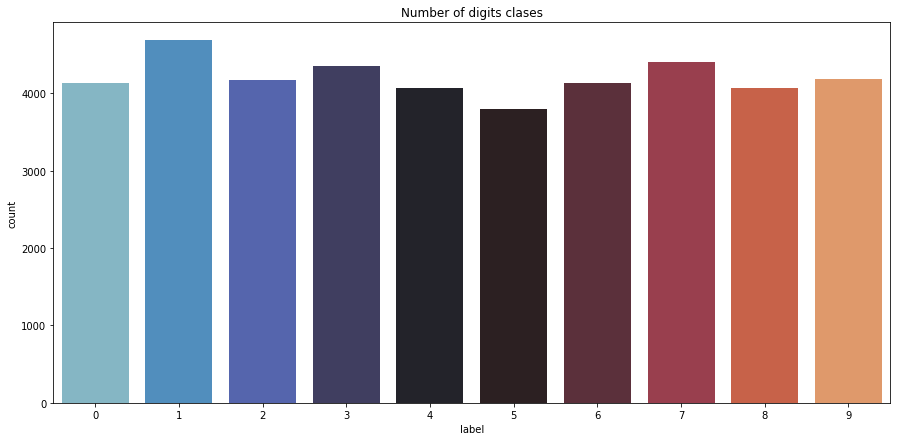

In [65]:
# visualize number of digits classes
print('Uniques labels:', np.sort(y_train.unique()))

plt.figure(figsize=(15,7))
g = sns.countplot(y_train, palette='icefire')
plt.title('Number of digits clases')
y_train.value_counts() #Comprobamos si está balanceado

(-0.5, 27.5, 27.5, -0.5)

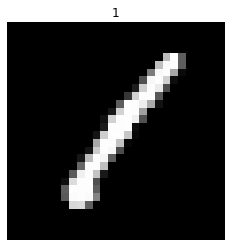

In [66]:
# plot some samples
img = X_train.iloc[0].to_numpy()
img = img.reshape(28,28)


plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')


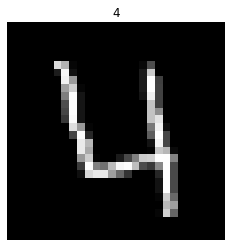

(-0.5, 27.5, 27.5, -0.5)

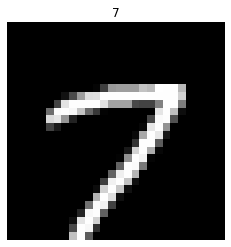

In [67]:
# plot some samples
img = X_train.iloc[3].to_numpy()
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show()


img = X_train.iloc[12250].to_numpy()
img = img.reshape(28,28)
plt.imshow(img, cmap='gray')
plt.title(train.iloc[12250,0])
plt.axis('off')

<a id="2"></a>
## Normalization, Reshape and Label Encoding 
* Normalization
    * We perform a grayscale normalization to reduce the effect of illumination's differences.
    * If we perform normalization, CNN works faster.
* Reshape
    * Train and test images (28 x 28) 
    * We reshape all data to 28x28x1 3D matrices.
    * Keras needs an extra dimension in the end which correspond to channels. Our images are gray scaled so it use only one channel (because there is one color B&w). 
* Label Encoding  
    * Encode labels to one hot vectors 
        * 2 => [0,0,1,0,0,0,0,0,0,0]
        * 4 => [0,0,0,0,1,0,0,0,0,0]

In [53]:
X_train.values.max()

255

In [68]:
# Normalize the data
X_train = X_train/(X_train.values.max())
test = test/X_train.values.max()
print("X_train shape:", X_train.shape)
print("Test shape:", test.shape)

X_train shape: (42000, 784)
Test shape: (28000, 784)


In [69]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1) #Ajusta al número de filas, 28 x 28, y en un solo canal==> 1 color, blanco y negro
test = test.values.reshape(-1,28,28,1)
print("X_train shape:", X_train.shape)
print("Test shape:", test.shape)

X_train shape: (42000, 28, 28, 1)
Test shape: (28000, 28, 28, 1)


In [70]:
# Label Encoding 
from keras.utils.np_utils import to_categorical #covert to one-hot-encoding

y_train = to_categorical(y_train, num_classes= 10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [57]:
y_train.shape

(42000, 10)

<a id="3"></a>
## Train Test Split
* We split the data into train and test sets.
* test size is 10%.
* train size is 90%.

In [71]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size=0.1, 
                                                  random_state= 2)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (37800, 28, 28, 1)
y_train shape: (37800, 10)
X_val shape: (4200, 28, 28, 1)
y_val shape: (4200, 10)


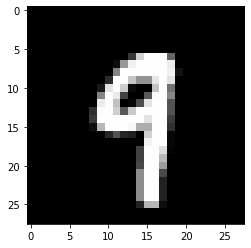

In [72]:
# Some examples
plt.imshow(X_train[2][:,:,0], cmap='gray')

<a id="4"></a>
## Convolutional Neural Network 
* CNN is used for image classification, object detection 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### What is Convolution Operation?
* We have some image and feature detector(3*3)
* Feature detector does not need to be 3 by 3 matrix. It can be 5 by 5 or 7 by 7.
* Feature detector = kernel = filter
* Feauture detector detects features like edges or convex shapes. Example, if out input is dog, feature detector can detect features like ear or tail of the dog.
* feature map = conv(input image, feature detector). Element wise multiplication of matrices.
* feature map = convolved feature
* Stride = navigating in input image.
* We reduce the size of image. This is important bc code runs faster. However, we lost information. 
* We create multiple feature maps bc we use multiple feature detectors(filters).
* Lets look at gimp. Edge detect: [0,10,0],[10,-4,10],[0,10,0]
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* After having convolution layer we use ReLU to break up linearity. Increase nonlinearity. Because images are non linear.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding
* As we keep applying conv layers, the size of the volume will decrease faster than we would like. In the early layers of our network, we want to preserve as much information about the original input volume so that we can extract those low level features.
* input size and output size are same.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* It makes down-sampling or sub-sampling (Reduces the number of parameters)
* It makes the detection of features invariant to scale or orientation changes. 
* It reduce the amount of parameters and computation in the network, and hence to also control overfitting. 
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Full Connection
* Neurons in a fully connected layer have connections to all activations in the previous layer
* Artificial Neural Network
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementing with Keras

<a id="11"></a>
### Create Model
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
* Dropout: Dropout is a technique where randomly selected neurons are ignored during training
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [74]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [77]:

model = Sequential()
#primera convolution y maxpool
model.add(Conv2D(filters= 8,
            kernel_size= (5,5),
            padding= 'Same',
            activation= 'relu',
            input_shape= (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25)) #Para evitar el sobre aprendizaje, descarto el 25% de las salidas 


#Segunda convolution y maxpool
model.add(Conv2D(filters= 16,
                 kernel_size= (3,3),
                 padding= 'Same',
                 activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2))) #Strides==> es el paso de movimiento para registrar el 'maxpool'
model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) #Descarta la  mitad
model.add(Dense(10, activation='softmax'))

<a id="12"></a>
### Define Optimizer   
* Adam optimizer: Change the learning rate


In [79]:
# Define the optimizer
optimizer = Adam(learning_rate= 0.001,
                 beta_1= 0.9,
                 beta_2= 0.999)

<a id="13"></a>
### Compile Model
* categorical crossentropy
* We make binary cross entropy at previous parts and in machine learning tutorial
* At this time we use categorical crossentropy. That means that we have multi class.
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [80]:
# Compile the model
model.compile(optimizer= optimizer,
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

<a id="14"></a>
### Epochs and Batch Size
* Say you have a dataset of 10 examples (or samples). You have a **batch size** of 2, and you've specified you want the algorithm to run for 3 **epochs**. Therefore, in each epoch, you have 5 **batches** (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations **per epoch**.
* reference: https://stackoverflow.com/questions/4752626/epoch-vs-iteration-when-training-neural-networks

In [ ]:
"""
una epoca(una iteración) es el proceso en el que se usa la información de todas las muestras, que pasan por la red neuronal... y define los pesos
En cada época se va ajustando los pesos de los inputs

batch==> grupo
Cada época la agrupa para que pasen menos muestras

el optimizador SGD(Descenso de gradiente estocástico)... sólo coge una cantidad de muestras para el calculo de descenso de gradiente sea más rápido.

"""

In [84]:
epochs = 10
batch_size = 250

<a id="15"></a>
### Data Augmentation
* To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
* Alter the training data with small transformations to reproduce the variations of digit.
* For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [82]:
#Generar de forma artificial más fotos(muestras) con un método de transformación de fotos(números y fotos en general)

# data augmentation
data_gen  = ImageDataGenerator(
                                featurewise_center= False,
                                samplewise_center= False,
                                featurewise_std_normalization= False,
                                samplewise_std_normalization= False,
                                zca_whitening= False,
                                rotation_range= 5, #Rotar de forma aleatoria hasta un 5%
                                zoom_range= 0.1, #apliar de forma aleatoria hasta un máximo de 0.1
                                width_shift_range = 0.1, #que me la ensanches de forma aleatoria desde un 0 a un 1%
                                height_shift_range= 0.1,
                                horizontal_flip= False,
                                vertical_flip= False)
data_gen.fit(X_train) #Lo entreno para que reconoczca con estos parametros sobre las imagenes que le he indicado

<a id="16"></a>
### Fit the model

In [85]:
# Fit the model
history = model.fit_generator(data_gen.flow(X_train, y_train, batch_size = batch_size ),
                              epochs= epochs,
                              validation_data=(X_val, y_val),
                              steps_per_epoch= X_train.shape[0] // batch_size) #División con cociente entero (sin decimal) el paso

Epoch 1/10
151/151 [==============================] - 18s 118ms/step - loss: 1.6193 - accuracy: 0.4368 - val_loss: 0.2129 - val_accuracy: 0.9445
Epoch 2/10
151/151 [==============================] - 21s 140ms/step - loss: 0.4726 - accuracy: 0.8514 - val_loss: 0.1302 - val_accuracy: 0.9626
Epoch 3/10
151/151 [==============================] - 21s 137ms/step - loss: 0.3221 - accuracy: 0.8995 - val_loss: 0.1047 - val_accuracy: 0.9690
Epoch 4/10
151/151 [==============================] - 21s 138ms/step - loss: 0.2702 - accuracy: 0.9154 - val_loss: 0.0893 - val_accuracy: 0.9729
Epoch 5/10
151/151 [==============================] - 21s 140ms/step - loss: 0.2321 - accuracy: 0.9289 - val_loss: 0.0767 - val_accuracy: 0.9767
Epoch 6/10
151/151 [==============================] - 21s 137ms/step - loss: 0.2133 - accuracy: 0.9338 - val_loss: 0.0723 - val_accuracy: 0.9771
Epoch 7/10
151/151 [==============================] - 22s 146ms/step - loss: 0.1925 - accuracy: 0.9384 - val_loss: 0.0669 - val_ac

<a id="17"></a>
### Evaluate the model
* Test Loss visualization
* Confusion matrix


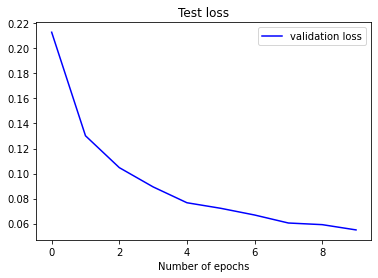

In [86]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color = 'b', label='validation loss')
plt.title('Test loss')
plt.xlabel('Number of epochs')
plt.legend()

<AxesSubplot:>

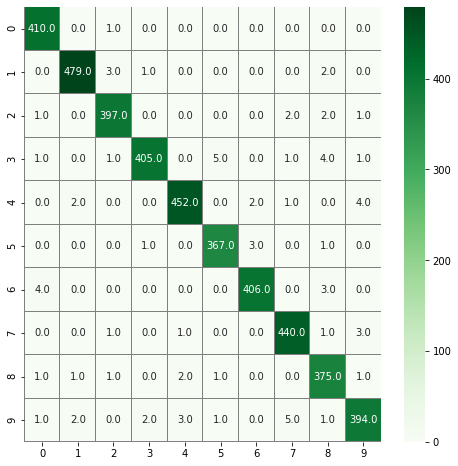

In [87]:
# confusion matrix
import seaborn as sns

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
confusion_mat = confusion_matrix(y_true, y_pred_classes)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mat, annot=True, linewidths = 0.01,
            cmap="Greens", linecolor="gray",
           fmt = '.1f', ax=ax)

In [ ]:
#otro ejercicio
https://www.aprendemachinelearning.com/clasificacion-de-imagenes-en-python/
